In [5]:
import numpy as np
import pandas as pd
import statistics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.metrics import precision_score,recall_score,confusion_matrix
from sklearn import metrics
import itertools

In [8]:
df = pd.read_excel("/Users/anushka/Desktop/Data Science - Intern_anushkaprakash/tumor.xlsx")
df = df.dropna(axis=1)   #because last column is entirely composed of NaNs
df = df.rename(columns={'Class: (2 for benign,  4 for malignant)':'Class'})
print(df.shape)
df.head()

(699, 11)


,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [9]:
for i in range(677):
    if df.loc[i,'Bare Nuclei'] == '?':
        df.loc[i,'Bare Nuclei'] = 0

In [10]:
X = df[['Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses']]
y = df['Class']
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.33, random_state=0)
X.shape
#y.shape

(699,)

In [11]:
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure()
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [12]:
def NaiveBayes():
    model = GaussianNB()
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    sc = model.score(X_test,y_test)
    print("Accuracy: "+str(sc))
    cm = metrics.confusion_matrix(y_test, pred, labels=[4, 2])
    plot_confusion_matrix(cm, classes=[4, 2])
    return sc#,ps,rs

Accuracy: 0.9393939393939394
[[ 80   3]
 [ 11 137]]


0.9393939393939394

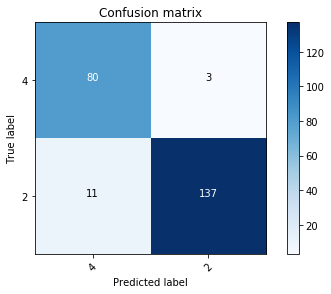

In [13]:
NaiveBayes()

In [14]:
def Logreg():
    model = LogisticRegression(C=5)
    model.fit(X_train,y_train)
    sc = model.score(X_test,y_test)
    print("Accuracy: "+str(sc)) 
    pred = model.predict(X_test)
    #ps = precision_score(y_test,pred)
    #rs = recall_score(y_test,pred)
    #print("The Precision Score(Type 1) is:")
    #print(ps)
    #print("The Recall Score(Type 2) is:")
    #print(rs)
    cm = metrics.confusion_matrix(y_test, pred, labels=[4, 2])
    plot_confusion_matrix(cm, classes=[4, 2])
    return sc#,ps,rs

Accuracy: 0.948051948051948
[[ 78   5]
 [  7 141]]


0.948051948051948

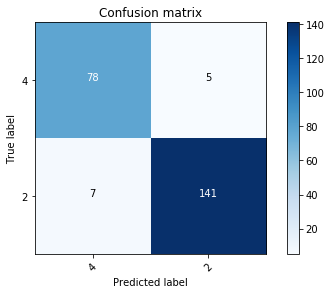

In [15]:
Logreg()

In [16]:
def RForest():
    model = RandomForestClassifier(max_depth=7, n_estimators=17, random_state=0)
    model.fit(X_train,y_train)
    sc = model.score(X_test,y_test)
    print("Accuracy: "+str(sc))
    pred = model.predict(X_test)
    #ps = precision_score(y_test,pred)
    #rs = recall_score(y_test,pred)
    #print("The Precision Score(Type 1) is:")
    #print(ps)
    #print("The Recall Score(Type 2) is:")
    #print(rs)
    cm = metrics.confusion_matrix(y_test, pred, labels=[4, 2])
    plot_confusion_matrix(cm, classes=[4, 2])
    return sc#,ps,rs

Accuracy: 0.9567099567099567
[[ 80   3]
 [  7 141]]


0.9567099567099567

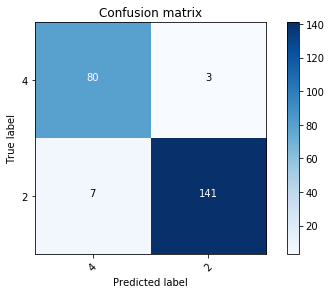

In [17]:
RForest()

In [18]:
def VectMachine():
    model = SVC(C=50, gamma=0.001)
    model.fit(X_train, y_train)
    sc = model.score(X_test,y_test)
    print("Accuracy: "+str(sc))
    pred = model.predict(X_test)
    cm = metrics.confusion_matrix(y_test, pred, labels=[4, 2])
    plot_confusion_matrix(cm, classes=[4, 2])
    return sc#,ps,rs

Accuracy: 0.948051948051948
[[ 78   5]
 [  7 141]]


0.948051948051948

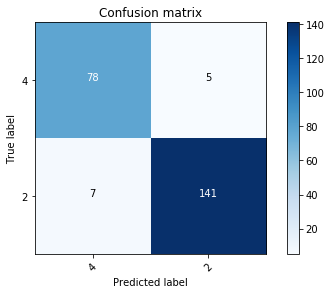

In [19]:
VectMachine()

In [20]:
def KNN():
    model = KNeighborsClassifier(n_neighbors=15)
    model.fit(X_train, y_train) 
    sc = model.score(X_test,y_test)
    print("Accuracy: "+str(sc))
    pred = model.predict(X_test)
    cm = metrics.confusion_matrix(y_test, pred, labels=[4,2])
    plot_confusion_matrix(cm, classes=[4,2])
    return sc

Accuracy: 0.9393939393939394
[[ 76   7]
 [  7 141]]


0.9393939393939394

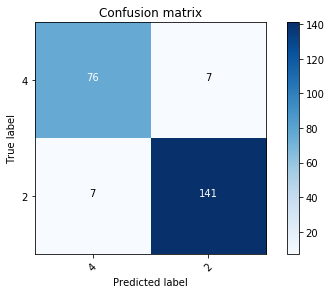

In [21]:
KNN()

In [22]:
def MaxVoting():
    model1 = GaussianNB()
    model2 = KNeighborsClassifier(n_neighbors=15)
    model3 = LogisticRegression(C=5)
    model4 = SVC(C=50, gamma=0.001)
    model5 = RandomForestClassifier(max_depth=7, n_estimators=17, random_state=0)
    
    model1.fit(X_train,y_train)
    model2.fit(X_train,y_train)
    model3.fit(X_train,y_train)
    model4.fit(X_train,y_train)
    model5.fit(X_train,y_train)
    
    pred1=model1.predict(X_test)
    pred2=model2.predict(X_test)
    pred3=model3.predict(X_test)
    pred4=model4.predict(X_test)
    pred5=model5.predict(X_test)
    
    y_test1 = np.array(y_test)
    type(y_test1)
    count=0
    final_pred = np.array([])
    for i in range(0,len(X_test)):
        final_pred = np.append(final_pred, statistics.mode([pred1[i],pred2[i],pred3[i],pred4[i],pred5[i]]))
    for i in range(len(final_pred)):
        if final_pred[i]==y_test1[i]:
            count+=1
    sc=count/(i)
    print(sc)
    cm = metrics.confusion_matrix(y_test, final_pred, labels=[4,2])
    plot_confusion_matrix(cm, classes=[4,2])
    return sc

0.9478260869565217
[[ 78   5]
 [  8 140]]


0.9478260869565217

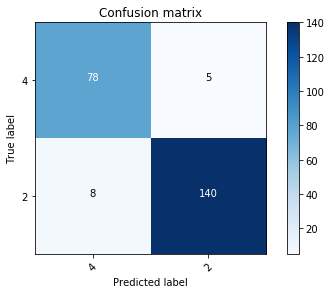

In [23]:
MaxVoting()